In [1]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [2]:
nx = 10
ny = 10

dx = 1. / nx
dy = 1. / ny

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)

X, Y = np.meshgrid(x_space, y_space)

[[ 0.         -0.0617284  -0.24691358 -0.55555556 -0.98765432 -1.54320988
  -2.22222222 -3.02469136 -3.95061728 -5.        ]
 [ 0.0617284   0.         -0.18518519 -0.49382716 -0.92592593 -1.48148148
  -2.16049383 -2.96296296 -3.88888889 -4.9382716 ]
 [ 0.24691358  0.18518519  0.         -0.30864198 -0.74074074 -1.2962963
  -1.97530864 -2.77777778 -3.7037037  -4.75308642]
 [ 0.55555556  0.49382716  0.30864198  0.         -0.43209877 -0.98765432
  -1.66666667 -2.4691358  -3.39506173 -4.44444444]
 [ 0.98765432  0.92592593  0.74074074  0.43209877  0.         -0.55555556
  -1.2345679  -2.03703704 -2.96296296 -4.01234568]
 [ 1.54320988  1.48148148  1.2962963   0.98765432  0.55555556  0.
  -0.67901235 -1.48148148 -2.40740741 -3.45679012]
 [ 2.22222222  2.16049383  1.97530864  1.66666667  1.2345679   0.67901235
   0.         -0.80246914 -1.72839506 -2.77777778]
 [ 3.02469136  2.96296296  2.77777778  2.4691358   2.03703704  1.48148148
   0.80246914  0.         -0.92592593 -1.97530864]
 [ 3.9506

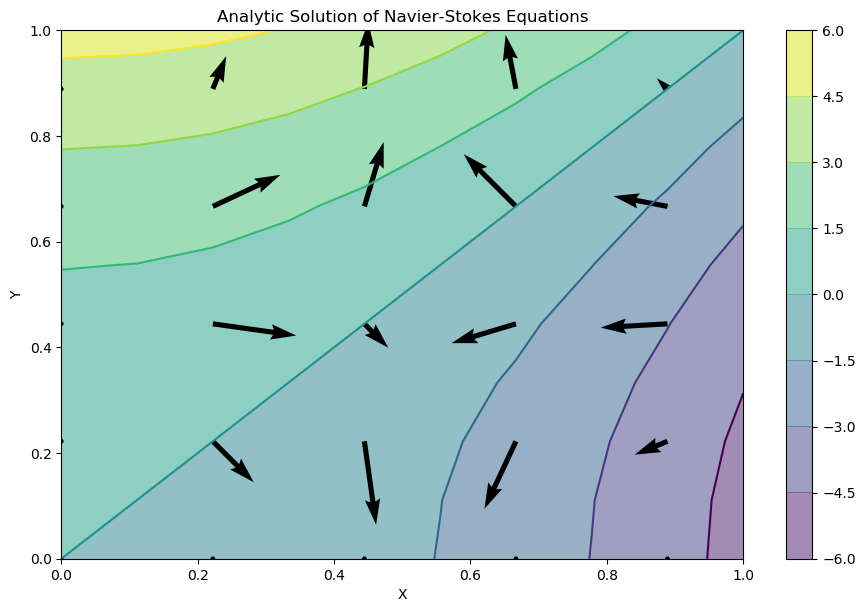

In [3]:
#Baymani, Modjtaba, Asghar Kerayechian, and Sohrab Effati. 
#"Artificial neural networks approach for solving stokes problem." Applied Mathematics 1, no. 04 (2010): 288-292
def analytic_solution_u(x,y):
    u = 10*np.power(x,2)*y*np.power(1-x,2)*(1-3*y+2*np.power(y,2))
    return u
def analytic_solution_v(x,y):
    v = -10*np.power(y,2)*x*np.power(1-y,2)*(1-3*x+2*np.power(x,2))
    return v
def analytic_solution_p(x,y):
    p = 5*(np.power(x,2)-np.power(y,2))
    return p

surface_u = np.zeros((ny, nx))
surface_v = np.zeros((ny, nx))
surface_p = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface_u[i][j] = analytic_solution_u(x, y)
        surface_v[i][j] = analytic_solution_v(x, y)
        surface_p[i][j] = analytic_solution_p(x, y)
        
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, surface_p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
plt.title('Analytic Solution of Navier-Stokes Equations')
# plotting the pressure field outlines
pyplot.contour(X, Y, surface_p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], surface_u[::2, ::2], surface_v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

print(surface_p)

411.2443600226275
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.81153413e-03 5.94210360e-03 1.34824480e-02
  2.94488688e-02 5.74602956e-02 1.00558686e-01 1.61173844e-01
  2.41184600e-01 3.42020143e-01]
 [0.00000000e+00 1.11828788e-02 2.25362755e-02 4.10678945e-02
  7.38337049e-02 1.27319930e-01 2.07042395e-01 3.17413872e-01
  4.61818086e-01 6.42787610e-01]
 [0.00000000e+00 2.05030866e-02 4.08772134e-02 6.98462247e-02
  1.16424908e-01 1.89090804e-01 2.95166855e-01 4.40546431e-01
  6.29726850e-01 8.66025404e-01]
 [0.00000000e+00 2.71543212e-02 5.39543997e-02 8.96890381e-02
  1.44207703e-01 2.27006604e-01 3.46449869e-01 5.09340145e-01
  7.20865738e-01 9.84807753e-01]
 [0.00000000e+00 2.89275255e-02 5.74654023e-02 9.44316061e-02
  1.49410568e-01 2.31889924e-01 3.50419704e-01 5.12060372e-01
  7.22220259e-01 9.84807753e-01]
 [0.00000000e+00 2.52612007e-02 5.028985

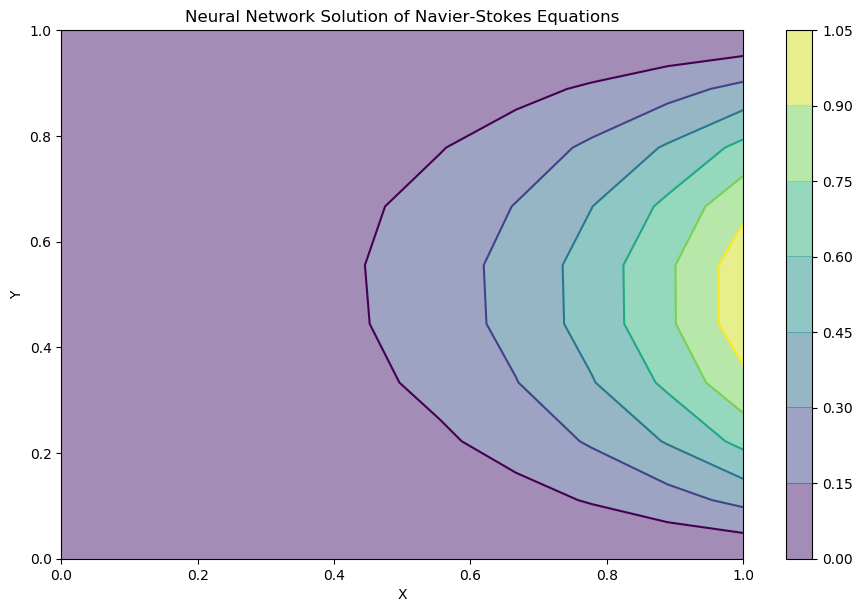

In [11]:
#https://becominghuman.ai/neural-networks-for-solving-differential-equations-fa230ac5e04c
def f(x):
    return 0.

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def A(x):
    return x[1] * np.sin(np.pi * x[0])


def p_trial(x, net_out):
    return A(x) + x[0] * (1 - x[0]) * x[1] * (1 - x[1]) * net_out


def loss_function(W, x, y):
    loss_sum = 0.
    
    for xi in x:
        for yi in y:
            
            input_point = np.array([xi, yi])
            
            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)
            
            psy_t = p_trial(input_point, net_out)
            psy_t_jacobian = jacobian(p_trial)(input_point, net_out)
            psy_t_hessian = jacobian(jacobian(p_trial))(input_point, net_out)

            gradient_of_trial_d2x = psy_t_hessian[0][0]
            gradient_of_trial_d2y = psy_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = np.power(((gradient_of_trial_d2x + gradient_of_trial_d2y) - func),2)
            loss_sum += err_sqr
        
    return loss_sum

W = [npr.randn(2, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space, y_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

print loss_function(W, x_space, y_space)

surface_nn = np.zeros((ny, nx))
        
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        net_outt = neural_network(W, [x, y])[0]
        surface_nn[i][j] = p_trial([x, y], net_outt)
        
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, surface_nn, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
plt.title('Neural Network Solution of Navier-Stokes Equations')
# plotting the pressure field outlines
pyplot.contour(X, Y, surface_nn, cmap=cm.viridis)  
# plotting velocity field
#pyplot.quiver(X[::2, ::2], Y[::2, ::2], surface_u[::2, ::2], surface_v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

print(surface_nn)